Heatmap showing correlation between variables:

/Users/benstone/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/benstone/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


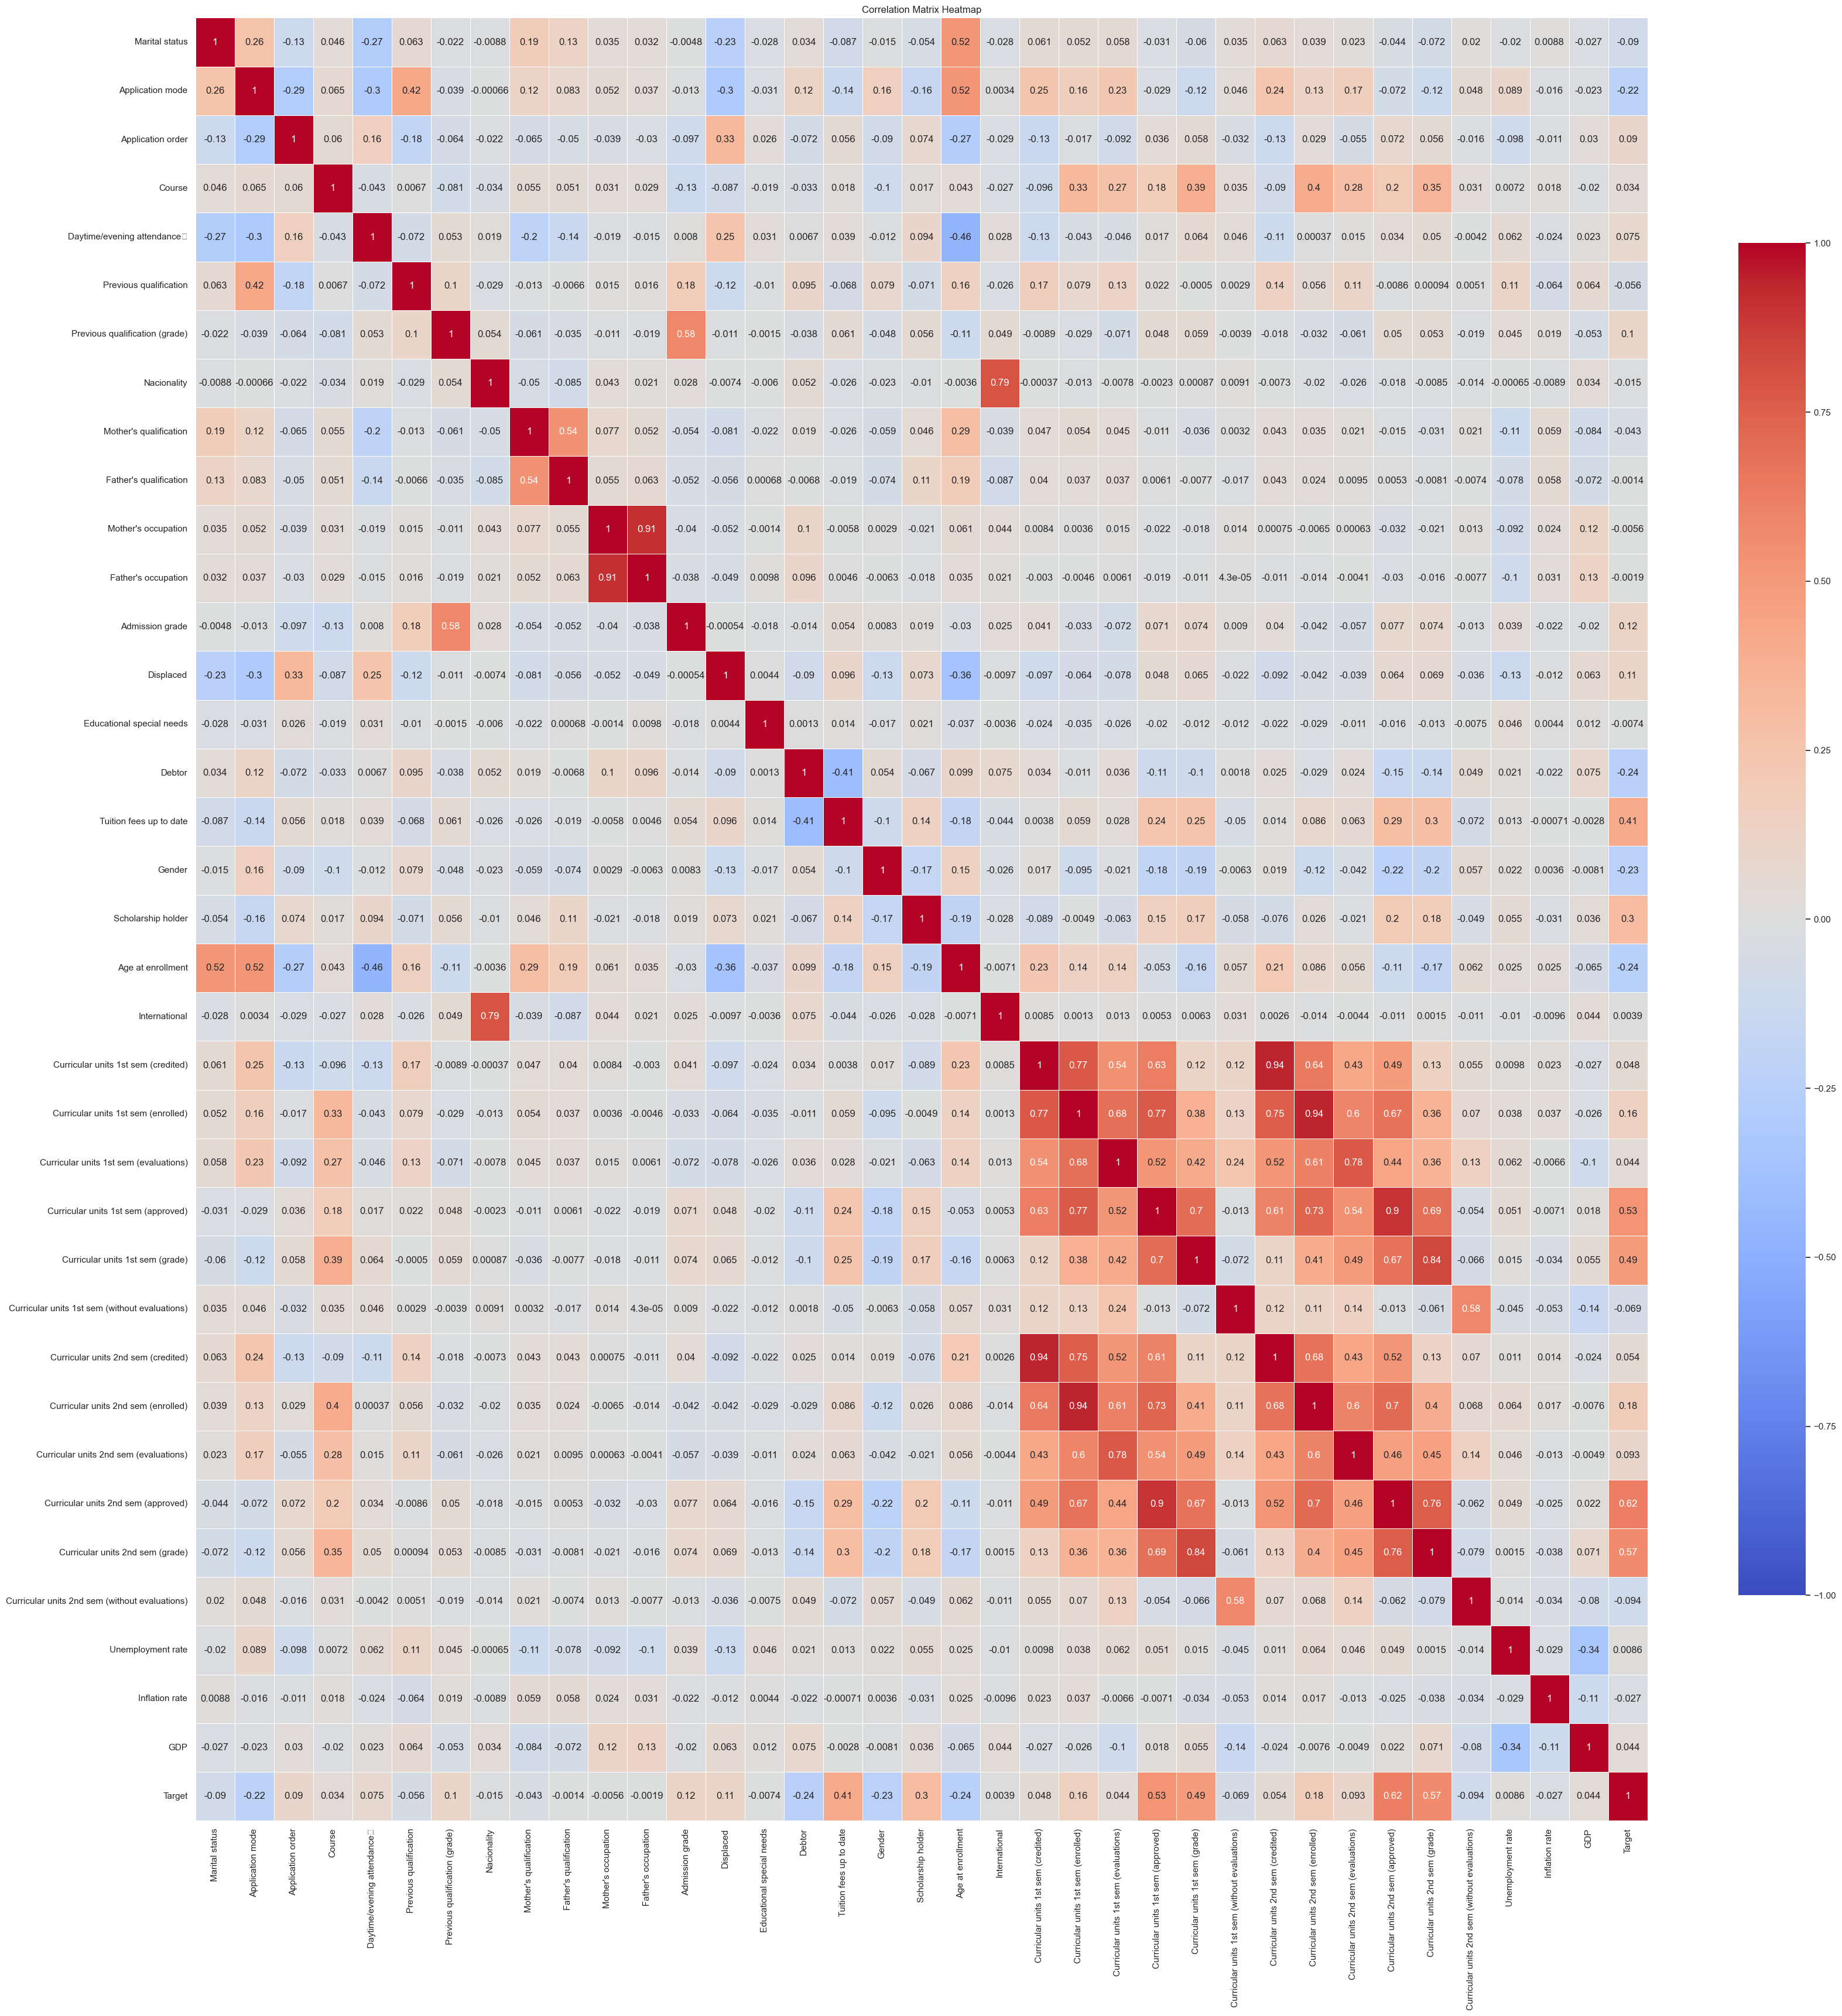

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Now you can proceed to convert the 'Target' column into numeric values
# Assuming that 'dropout' is the label for students at risk, 'enrolled' for students who continue, and 'graduate' for students who graduate
dropout_data['Target'] = dropout_data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# Calculate the correlation matrix
correlation_matrix = dropout_data.corr()

# Create the correlation heatmap
plt.figure(figsize=(40,40))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix Heatmap")

plt.show()


Naive first attempt to predict Target:

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Now you can proceed to convert the 'Target' column into numeric values
# Assuming that 'dropout' is the label for students at risk, 'enrolled' for students who continue, and 'graduate' for students who graduate
dropout_data['Target'] = dropout_data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# Feature selection using LASSO (L1 regularization)
X = dropout_data.drop(columns=['Target'])
y = dropout_data['Target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

lasso = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Models
svm_model = SVC(kernel='linear')
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100)

# Train the models
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)
logistic_pred = logistic_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_pred)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


SVM Accuracy: 0.7491525423728813
Logistic Regression Accuracy: 0.752542372881356
K-Nearest Neighbors Accuracy: 0.6983050847457627
Random Forest Accuracy: 0.7694915254237288
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       316
           1       0.45      0.32      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.74      0.75      0.74       885

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74     

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Now you can proceed to convert the 'Target' column into numeric values
# Assuming that 'dropout' is the label for students at risk, 'enrolled' for students who continue, and 'graduate' for students who graduate
dropout_data['Target'] = dropout_data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# Feature selection using LASSO (L1 regularization)
X = dropout_data.drop(columns=['Target'])
y = dropout_data['Target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

lasso = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

# Define a range of training/testing splits
split_range = [0.6, 0.7, 0.8, 0.9]

# Loop through different splits
for split in split_range:
    print(f"Split: {split * 100}% training, {100 - split * 100}% testing")
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=1 - split, random_state=42)

    # Models
    svm_model = SVC(kernel='linear')
    logistic_model = LogisticRegression(max_iter=1000)

    # Define parameter grids for KNN and Random Forest
    knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
    rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}

    # Grid search for KNN
    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
    knn_grid.fit(X_train, y_train)
    best_knn_model = knn_grid.best_estimator_
    knn_pred = best_knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)

    # Grid search for Random Forest
    rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
    rf_grid.fit(X_train, y_train)
    best_rf_model = rf_grid.best_estimator_
    rf_pred = best_rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)

    # Evaluate the models
    svm_model.fit(X_train, y_train)
    logistic_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    logistic_pred = logistic_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    logistic_accuracy = accuracy_score(y_test, logistic_pred)

    print("SVM Accuracy:", svm_accuracy)
    print("Logistic Regression Accuracy:", logistic_accuracy)
    print("K-Nearest Neighbors Accuracy:", knn_accuracy)
    print("Random Forest Accuracy:", rf_accuracy)

    print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
    print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
    print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_pred))
    print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
    print()


Split: 60.0% training, 40.0% testing
SVM Accuracy: 0.7581920903954802
Logistic Regression Accuracy: 0.7570621468926554
K-Nearest Neighbors Accuracy: 0.7050847457627119
Random Forest Accuracy: 0.764406779661017
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       588
           1       0.51      0.36      0.42       326
           2       0.77      0.92      0.84       856

    accuracy                           0.76      1770
   macro avg       0.71      0.67      0.68      1770
weighted avg       0.75      0.76      0.75      1770

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       588
           1       0.50      0.32      0.39       326
           2       0.78      0.92      0.84       856

    accuracy                           0.76      1770
   macro avg       0.70      0.67      0.67      1770
weighted av

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Convert the 'Target' column into numeric values
label_encoder = LabelEncoder()
dropout_data['Target'] = label_encoder.fit_transform(dropout_data['Target'])

# Split the data into features and the target
X = dropout_data.drop(columns=['Target'])
y = dropout_data['Target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output units for 'dropout', 'enrolled', and 'graduate'

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert target labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions back to labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Epoch 1/100
111/111 [==============================] - 0s 456us/step - loss: 0.7629 - accuracy: 0.6821
Epoch 2/100
111/111 [==============================] - 0s 444us/step - loss: 0.6085 - accuracy: 0.7511
Epoch 3/100
111/111 [==============================] - 0s 431us/step - loss: 0.5680 - accuracy: 0.7697
Epoch 4/100
111/111 [==============================] - 0s 429us/step - loss: 0.5417 - accuracy: 0.7838
Epoch 5/100
111/111 [==============================] - 0s 430us/step - loss: 0.5266 - accuracy: 0.7861
Epoch 6/100
111/111 [==============================] - 0s 425us/step - loss: 0.5132 - accuracy: 0.7898
Epoch 7/100
111/111 [==============================] - 0s 423us/step - loss: 0.5001 - accuracy: 0.7991
Epoch 8/100
111/111 [==============================] - 0s 419us/step - loss: 0.4893 - accuracy: 0.8025
Epoch 9/100
111/111 [==============================] - 0s 410us/step - loss: 0.4793 - accuracy: 0.8079
Epoch 10/100
111/111 [==============================] - 0s 425us/step - l

111/111 [==============================] - 0s 427us/step - loss: 0.1348 - accuracy: 0.9593
Epoch 80/100
111/111 [==============================] - 0s 440us/step - loss: 0.1338 - accuracy: 0.9610
Epoch 81/100
111/111 [==============================] - 0s 434us/step - loss: 0.1310 - accuracy: 0.9587
Epoch 82/100
111/111 [==============================] - 0s 438us/step - loss: 0.1256 - accuracy: 0.9638
Epoch 83/100
111/111 [==============================] - 0s 426us/step - loss: 0.1230 - accuracy: 0.9647
Epoch 84/100
111/111 [==============================] - 0s 422us/step - loss: 0.1212 - accuracy: 0.9638
Epoch 85/100
111/111 [==============================] - 0s 420us/step - loss: 0.1191 - accuracy: 0.9641
Epoch 86/100
111/111 [==============================] - 0s 412us/step - loss: 0.1180 - accuracy: 0.9658
Epoch 87/100
111/111 [==============================] - 0s 421us/step - loss: 0.1148 - accuracy: 0.9675
Epoch 88/100
111/111 [==============================] - 0s 426us/step - loss: